In [1]:

import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers

2024-05-11 22:48:14.666348: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()


#normalize the data
x_train = x_train/255
x_test = x_test/255

print(x_train.shape)
print(y_train.shape)



(60000, 28, 28)
(60000,)


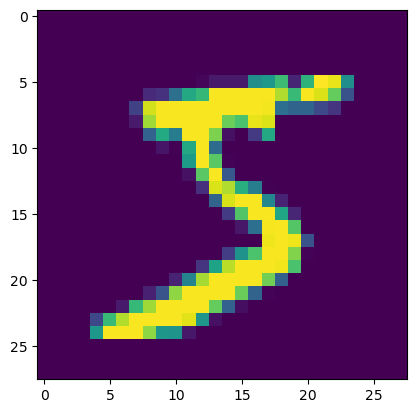

In [3]:
plt.imshow(x_train[0])

In [4]:
'''

model_lr = tf.keras.models.Sequential([
    layers.Input(x_train.shape[1:]),
    layers.Flatten(),
    layers.Dense(10,activation='softmax')
])

model_lr.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
model_lr.summary()

y_onehot_train = tf.one_hot(y_train, 10)
model_lr.fit(x_train,y_onehot_train)
'''


"\n\nmodel_lr = tf.keras.models.Sequential([\n    layers.Input(x_train.shape[1:]),\n    layers.Flatten(),\n    layers.Dense(10,activation='softmax')\n])\n\nmodel_lr.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])\nmodel_lr.summary()\n\ny_onehot_train = tf.one_hot(y_train, 10)\nmodel_lr.fit(x_train,y_onehot_train)\n"

In [5]:
model_lr = tf.keras.models.Sequential([

    layers.Input(x_train.shape[1:]),
    layers.Flatten(),
    layers.Dense(10,activation='softmax')
])

# use sparse_ to avoid doing the one_hot 
model_lr.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_lr.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [6]:
#model_lr.fit(x_train, y_train)

In [7]:
history_lr = model_lr.fit(x_train,y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 3s 1ms/step - loss: 0.5107 - accuracy: 0.8669 - val_loss: 0.3181 - val_accuracy: 0.9120
Epoch 2/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3176 - accuracy: 0.9107 - val_loss: 0.2897 - val_accuracy: 0.9207
Epoch 3/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2929 - accuracy: 0.9170 - val_loss: 0.2734 - val_accuracy: 0.9237
Epoch 4/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2813 - accuracy: 0.9202 - val_loss: 0.2727 - val_accuracy: 0.9264
Epoch 5/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2732 - accuracy: 0.9238 - val_loss: 0.2658 - val_accuracy: 0.9280
Epoch 6/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2684 - accuracy: 0.9250 - val_loss: 0.2635 - val_accuracy: 0.9286
Epoch 7/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2632 - accuracy: 0.9268 - val_loss: 0.2655 - val_accuracy:

In [8]:
history_lr.history

{'loss': [0.5106946229934692,
  0.31755518913269043,
  0.29289400577545166,
  0.28125330805778503,
  0.273192435503006,
  0.2683538794517517,
  0.2632356286048889,
  0.26053330302238464,
  0.25764399766921997,
  0.2549629211425781],
 'accuracy': [0.8668749928474426,
  0.9107499718666077,
  0.9169583320617676,
  0.9201874732971191,
  0.9237708449363708,
  0.9250208139419556,
  0.9268333315849304,
  0.9273750185966492,
  0.9286041855812073,
  0.9283333420753479],
 'val_loss': [0.31814005970954895,
  0.28968507051467896,
  0.27344733476638794,
  0.2727142870426178,
  0.26577863097190857,
  0.2634596526622772,
  0.26551899313926697,
  0.26371514797210693,
  0.2615257501602173,
  0.26266956329345703],
 'val_accuracy': [0.9120000004768372,
  0.9206666946411133,
  0.9236666560173035,
  0.9264166951179504,
  0.9279999732971191,
  0.9285833239555359,
  0.9273333549499512,
  0.9272500276565552,
  0.9299166798591614,
  0.9298333525657654]}

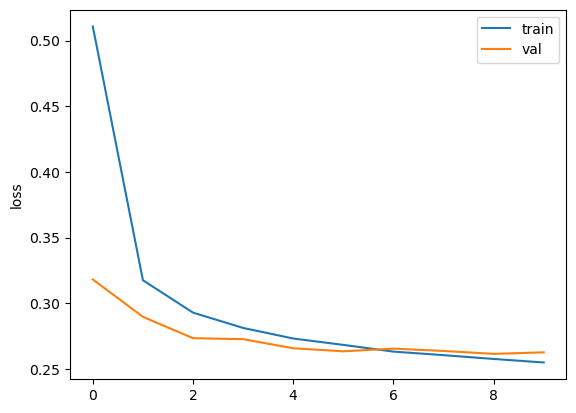

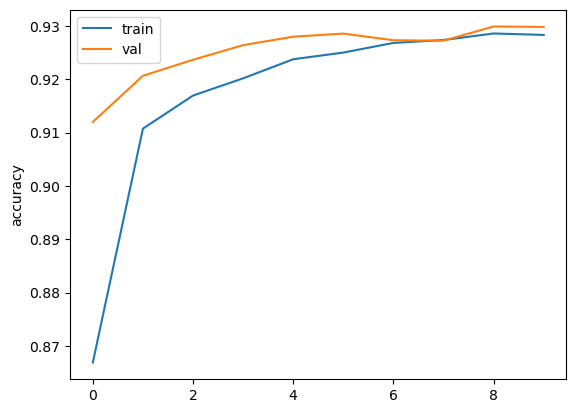

In [9]:
plt.plot(history_lr.history['loss'], label='train')
plt.plot(history_lr.history['val_loss'], label='val')

plt.ylabel('loss')
plt.legend()
plt.show()

plt.plot(history_lr.history['accuracy'], label='train')
plt.plot(history_lr.history['val_accuracy'], label='val')
plt.ylabel('accuracy')
plt.legend()
plt.show()



In [10]:
model_lr.evaluate(x_test, y_test)

313/313 [==============================] - 0s 967us/step - loss: 0.2674 - accuracy: 0.9268


[0.267404705286026, 0.926800012588501]

1/1 [==============================] - 0s 87ms/step
[1.5819073e-06 7.3873963e-12 3.5486150e-06 7.9947244e-03 3.3440514e-07
 1.9558340e-05 7.6329247e-12 9.9132216e-01 2.5059624e-05 6.3293980e-04]  =>  7


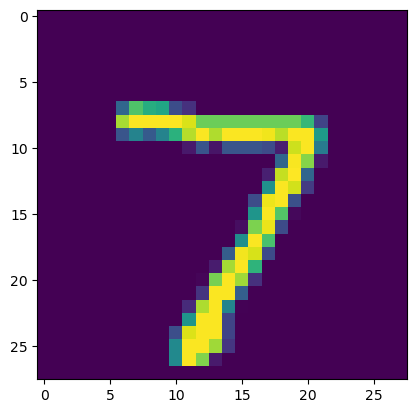

[7.9993661e-05 5.8799887e-06 9.9533600e-01 5.9098151e-05 1.8486696e-14
 7.2597264e-04 3.7528335e-03 4.9359757e-18 4.0213366e-05 2.4323859e-14]  =>  2


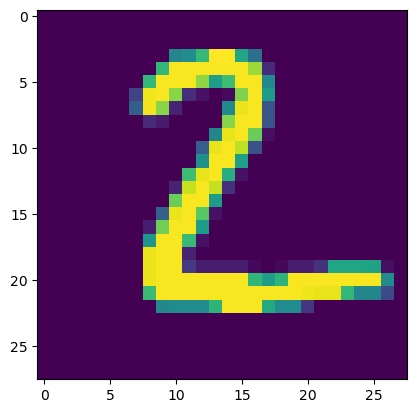

[1.7047774e-06 9.7941512e-01 1.0385460e-02 2.3871390e-03 1.4348468e-04
 6.5530604e-04 1.0334473e-03 5.1148771e-04 5.2253180e-03 2.4155875e-04]  =>  1


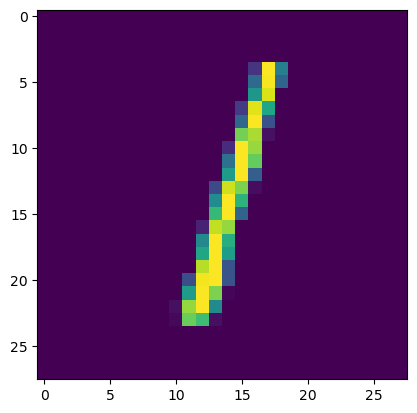

[9.99810040e-01 1.97498354e-11 3.52354073e-05 3.60160038e-06
 4.06962819e-08 4.53643042e-05 7.73984866e-05 5.03459296e-06
 1.09316388e-05 1.24455355e-05]  =>  0


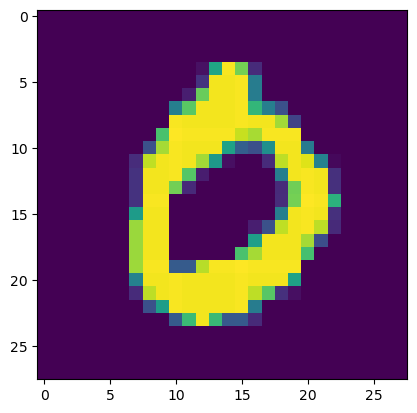

[3.4780600e-04 1.6542776e-07 1.2978100e-03 1.9340116e-05 9.7458559e-01
 5.0074967e-05 1.2019208e-03 1.4160250e-03 3.9491551e-03 1.7132066e-02]  =>  4


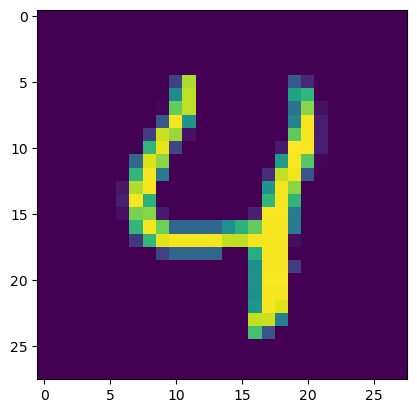

In [11]:
probs = model_lr.predict(x_test[:5])
preds = np.argmax(probs, axis=1)
for i in range(5):
    print(probs[i], " => ", preds[i])
    plt.imshow(x_test[i])
    plt.show()



In [12]:

#multi layer perceptron
model_mlp = tf.keras.Sequential([
    layers.Input(x_train.shape[1:]),
    layers.Flatten(),
    layers.Dense(64, activation='elu'),
    layers.Dense(64,activation='elu'),
    layers.Dense(10, activation='softmax')
])

model_mlp.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_mlp.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                50240     
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 


Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [13]:
history_mlp = model_mlp.fit(x_train,y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3113 - accuracy: 0.9090 - val_loss: 0.1824 - val_accuracy: 0.9480
Epoch 2/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1494 - accuracy: 0.9557 - val_loss: 0.1317 - val_accuracy: 0.9608
Epoch 3/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1039 - accuracy: 0.9690 - val_loss: 0.1145 - val_accuracy: 0.9630
Epoch 4/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0825 - accuracy: 0.9746 - val_loss: 0.0965 - val_accuracy: 0.9705
Epoch 5/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0633 - accuracy: 0.9796 - val_loss: 0.0996 - val_accuracy: 0.9713
Epoch 6/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0515 - accuracy: 0.9834 - val_loss: 0.0963 - val_accuracy: 0.9726
Epoch 7/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0424 - accuracy: 0.9862 - val_loss: 0.0994 - val_accuracy:

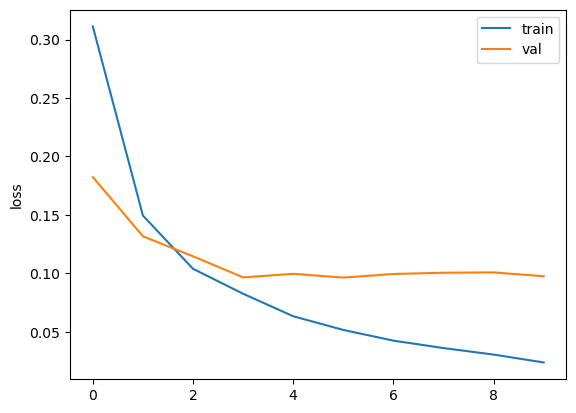

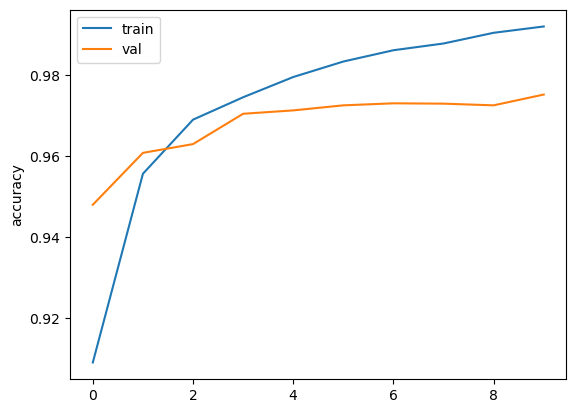

In [14]:
plt.plot(history_mlp.history['loss'], label='train')
plt.plot(history_mlp.history['val_loss'], label='val')

plt.ylabel('loss')
plt.legend()
plt.show()

plt.plot(history_mlp.history['accuracy'], label='train')
plt.plot(history_mlp.history['val_accuracy'], label='val')
plt.ylabel('accuracy')
plt.legend()
plt.show()


1/1 [==============================] - 0s 85ms/step
[2.4709371e-07 5.5713995e-10 2.4076240e-05 4.5564905e-04 2.1145766e-13
 4.1051937e-10 4.4037026e-13 9.9950790e-01 2.7688995e-07 1.1839213e-05]  =>  7


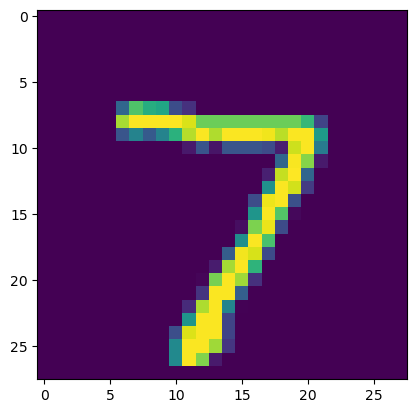

[3.8724917e-12 1.9683957e-04 9.9980313e-01 2.5729372e-09 9.0310762e-19
 9.0754129e-13 3.0173843e-12 9.0389400e-14 1.2267060e-10 2.1144123e-15]  =>  2


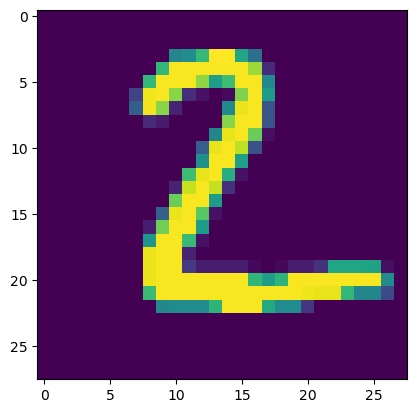

[8.6113888e-10 9.9998021e-01 7.9268175e-06 3.6011241e-10 3.6320383e-08
 7.5705232e-12 3.4993320e-08 9.9456047e-06 1.8674996e-06 3.6636555e-11]  =>  1


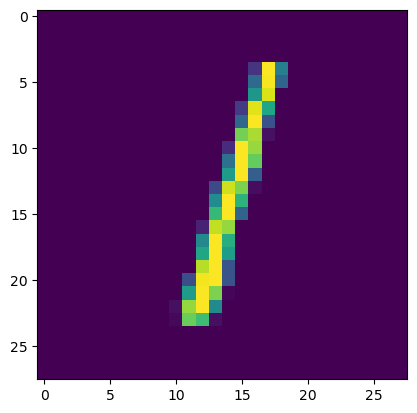

[9.99931216e-01 2.16563620e-08 1.00848938e-05 1.95021821e-09
 3.41065913e-08 1.55518085e-10 1.03706064e-07 8.39976764e-08
 1.36915379e-09 5.84722147e-05]  =>  0


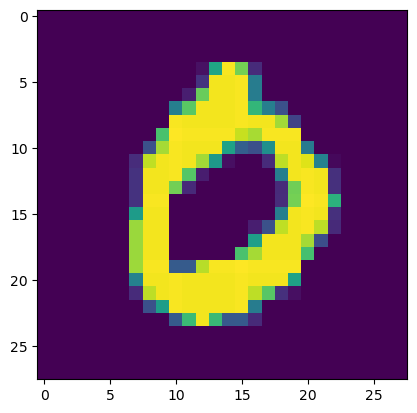

[5.9001574e-11 2.4179733e-10 3.1904510e-11 1.5311215e-12 9.9996972e-01
 5.4708581e-13 2.2759570e-09 4.9188877e-08 2.6357810e-11 3.0244611e-05]  =>  4


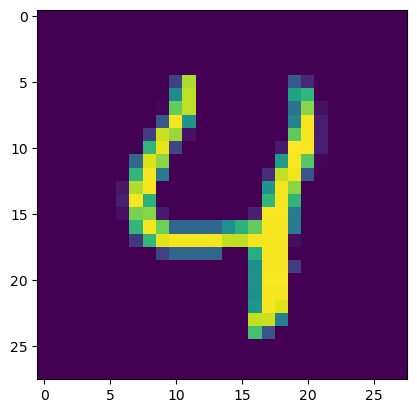

In [15]:
probs = model_mlp.predict(x_test[:5])
preds = np.argmax(probs, axis=1)
for i in range(5):
    print(probs[i], " => ", preds[i])
    plt.imshow(x_test[i])
    plt.show()
